En este cuaderno vamos a realizar un análisis de los 5 Tipos de personalidad descritos por el test de los 5 grandes.


¿Por qué las personas responden de forma diferente ante la misma situación? En la psicología contemporánea los Cinco Grandes factores de la personalidad son cinco grandes dominios que definen la personalidad humana y que explican las diferencias individuales. Este artículo le ofrece más información sobre la teoría de la personalidad de los Cinco Grandes. Una vez que lo haya leído, realice el test de personalidad gratuito para determinar su tipo de personalidad según los Cinco Grandes.

Los profesionales de Recursos Humanos a menudo utilizan las dimensiones de la personalidad de los Cinco Grandes para ayudar a colocar a los empleados. Esto se debe a que estas dimensiones se consideran los rasgos subyacentes que conforman la personalidad global de un individuo. Los Cinco Grandes rasgos son:
Apertura a la experiencia, Responsabilidad (tesón), Extraversión, Cordialidad/Amabilidad y Estabilidad emocional (o OCEAN por sus siglas en inglés):

*Apertura a la experiencia 

*Responsabilidad (tesón)

*Extraversión

*Cordialidad/Amabilidad

*Estabilidad emociona
    

Los datos los he sacado de   , se trata de un adataset con 110 caracteristicas de individuos a los que se les ha hecho las 50 preguntas del test:

Estas 50 preguntas estan medidas enuna escala de 1-5 de agrado/desagrado

Ya que se trata de un dataset con mjchos datos numercios la únnica caracteristica con la que podemos trabajr para ver los resultados de una forma mas visual e intuitiva es el pais.

Vamos ha intentar entrenar una serie de algoritmos para predecir la eficacia del mismo sobre la variable **COUNTRY**



**EXPLICACIÓN DE LOS DATOS**

    50 columnas de preguntas al test con valor de 1-5 de desagrado (5 > agrado)
    dateload    El timestamp de la encuesta.
    screenw     El ancho de la pantalla del usuario en pixels
    screenh     El largo de la pantalla del usuario en pixels
    introelapse Tiempo en segundos en la pantalla inicial(landing)
    testelapse  Tiempo en segundos en la pantalla de la encuesta
    endelapse   Tiempo en segundos en la pagina de finalización
    IPC         Número de registros de la IP del usuario
    country     Pais
    lat_appx_lots_of_err    Latitud del usuario(geo)
    long_appx_lots_of_err   Longitud del usuario(geo)

**PIPELINE**

The proccess is the following:

    1.Carga de libreias necesarias
    2.Carga de los datos.
    3.Primer analisis
    4.Limpieza de datos
    5.Encoding data
    6.Relación de variables.Matriz de covarianza
    7.Distribución de frecuencias
    8.Preparación de datos para algoritmos
    9.Evaluación de modelo inicial Logistic Regression
    10.Evaluación final de modelos de clasiificación de pais
      * Logistic Regression
      * K-Nearest Neighbors classifier
      * XGB classifier
      * DecisionTreeClassifier
      * Random Forest Classifier
      * SVC
      * K-Nearest Neighbors Regression
      * AdaBoostClassifier
    11.NN para regresión de rasgo
    12.Gráfica de resultados
    13.Predicciones
    14.Conclusión


**1. CARGA DE LIBRERIAS NECESARIAS**

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
%matplotlib inline
!pip install pycountry
import pycountry
!pip install geopandas
import geopandas as gpd
import xgboost as xgb
from sklearn import preprocessing
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from datetime import datetime
#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from termcolor import colored
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**2.CARGA DE LOS DATOS**

In [3]:
!git clone https://gitlab.com/davidllorenteraposo/proyectofinalkcdll.git

fatal: destination path 'proyectofinalkcdll' already exists and is not an empty directory.


In [0]:
BIG5_df = pd.read_csv('proyectofinalkcdll/data/bif5data_final.csv',encoding="ISO-8859-1", sep="\t")

**3.PRIMER ANÁLISIS DE LOS DATOS**

Shape del dataset. Vemos que tenemos 1015341 registros con 110 variables

In [0]:
BIG5_df.shape

(1015341, 110)

Vemos las columnas

In [0]:
BIG5_df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

Despues de hacer bastantes pruebas con todas las observaciones, veo  que los algoritmos tardan mucho tiempo asi que he optado por reducir el tamaño de los datos

In [0]:
seed=np.random.seed(123)
BIG5_df = BIG5_df.sample(n=100000, random_state=seed)

In [0]:
print(f"El dataset contiene {len(BIG5_df)} observaciones de resultados de BIG5 test y {BIG5_df.shape[1]} columnas")

BIG5_df.head(3)

The dataset contiene 100000 observaciones de resultados de BIG5 test y 110 columnas


EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  \
834672   2.0   4.0   4.0   2.0   3.0   2.0   4.0   1.0   1.0    4.0   5.0   
49651    3.0   1.0   3.0   3.0   3.0   1.0   4.0   4.0   3.0    4.0   4.0   
679107   2.0   2.0   3.0   4.0   5.0   2.0   2.0   5.0   1.0    5.0   4.0   

        EST2  EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  \
834672   4.0   5.0   2.0   1.0   1.0   1.0   1.0   1.0    1.0   3.0   4.0   
49651    2.0   5.0   2.0   1.0   3.0   3.0   3.0   2.0    4.0   5.0   5.0   
679107   2.0   4.0   4.0   2.0   1.0   2.0   1.0   2.0    1.0   1.0   5.0   

        AGR3  AGR4  AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  \
834672   1.0   4.0   2.0   3.0   2.0   4.0   4.0    3.0   5.0   5.0   5.0   
49651    1.0   4.0   1.0   5.0   1.0   4.0   4.0    4.0   2.0   4.0   5.0   
679107   1.0   5.0   2.0   4.0   2.0   5.0   4.0    5.0   2.0   4.0   4.0   

        CSN4  CSN5  CSN6  CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  \
834672   1.0   2.0   5.0   2.0   2.0   3.0    4.0   4.0   5.0   5.0   4.0   
49651    4.0   1.0   2.0   2.0   3.0   2.0    3.0   4.0   2.0   4.0   2.0   
679107   2.0   1.0   2.0   4.0   2.0   4.0    4.0   4.0   4.0   5.0   1.0   

        OPN5  OPN6  OPN7  OPN8  OPN9  OPN10   EXT1_E  EXT2_E  EXT3_E   EXT4_E  \
834672   4.0   2.0   5.0   1.0   2.0    4.0   6375.0  3132.0  2855.0   3856.0   
49651    4.0   2.0   4.0   2.0   4.0    4.0  14630.0   733.0  3168.0  11468.0   
679107   5.0   1.0   2.0   2.0   5.0    5.0  23594.0  4526.0  4458.0   4936.0   

        EXT5_E  EXT6_E  EXT7_E  EXT8_E  EXT9_E  EXT10_E  EST1_E  EST2_E  \
834672  2473.0  2630.0  5214.0  3179.0  4125.0   3089.0  1148.0  5329.0   
49651   2663.0  2300.0  2772.0  2013.0  3483.0   1969.0  6745.0  2465.0   
679107  3008.0  6609.0  3439.0  7293.0  2558.0   4589.0  6445.0  3159.0   

        EST3_E  EST4_E  EST5_E  EST6_E  EST7_E  EST8_E  EST9_E  EST10_E  \
834672  2005.0  4612.0  2544.0  3575.0  2359.0  1780.0  1626.0   1063.0   
49651   1117.0  4286.0  1735.0  3238.0  6523.0  1200.0  2033.0   7468.0   
679107  2323.0  6123.0  3486.0  2357.0  4554.0  2034.0  2200.0   4345.0   

         AGR1_E  AGR2_E  AGR3_E  AGR4_E  AGR5_E  AGR6_E  AGR7_E  AGR8_E  \
834672   4470.0  4809.0   983.0  2827.0  2762.0  5225.0  2387.0  2925.0   
49651    3501.0  6404.0  3248.0  3670.0  2167.0  2086.0  2445.0  2097.0   
679107  12097.0  1936.0  2872.0  2781.0  8323.0  2446.0  5218.0  6950.0   

        AGR9_E  AGR10_E   CSN1_E  CSN2_E  CSN3_E  CSN4_E  CSN5_E  CSN6_E  \
834672  3737.0   3859.0   3614.0  3851.0  2246.0  2184.0  2153.0  4267.0   
49651   1752.0   2568.0   4767.0  4116.0  1283.0  3381.0  1666.0  6397.0   
679107  4453.0   3355.0  11316.0  3743.0  4695.0  5643.0  4598.0  4960.0   

        CSN7_E  CSN8_E  CSN9_E  CSN10_E  OPN1_E   OPN2_E  OPN3_E  OPN4_E  \
834672  2897.0  1918.0  5630.0   3430.0  2947.0  10094.0  1933.0  4655.0   
49651   1504.0  6100.0  1862.0   1934.0  5167.0   4353.0  1332.0  2935.0   
679107  8099.0  2376.0  4155.0  16472.0  2583.0   6137.0  2080.0  3370.0   

        OPN5_E  OPN6_E  OPN7_E  OPN8_E  OPN9_E  OPN10_E             dateload  \
834672  1613.0  5739.0  2508.0  3511.0  5325.0   1358.0  2018-07-22 15:42:30   
49651   1533.0  2113.0  3115.0  3804.0  2067.0   1380.0  2016-04-09 14:35:15   
679107  2271.0  3650.0  3874.0  3605.0  3193.0   1882.0  2018-03-29 21:48:23   

        screenw  screenh  introelapse  testelapse  endelapse  IPC country  \
834672   1280.0    720.0          6.0       170.0         10    1      US   
49651     320.0    568.0          6.0       174.0         11    1      US   
679107    360.0    640.0         14.0       252.0         11    1      US   

       lat_appx_lots_of_err long_appx_lots_of_err  
834672              30.4285              -91.0195  
49651                  38.0                 -97.0  
679107                 38.0                 -97.0

Vemos que se trata de un dataset con muchas variables:

Las 50 primeras variables se tratan de las respuestas a las 50 preguntas del test puntuadas de 1-5 (5 de acuerdo)



Hacemos un primer analisis estadistico de las variables numericas del dataset

In [0]:
BIG5_df.describe().T

count          mean           std         min      25%  \
EXT1          99812.0      2.650273  1.264972e+00         0.0     2.00   
EXT2          99812.0      2.771641  1.322416e+00         0.0     2.00   
EXT3          99812.0      3.293021  1.212059e+00         0.0     2.00   
EXT4          99812.0      3.140895  1.233439e+00         0.0     2.00   
EXT5          99812.0      3.276390  1.276465e+00         0.0     2.00   
EXT6          99812.0      2.398209  1.222109e+00         0.0     1.00   
EXT7          99812.0      2.776850  1.399575e+00         0.0     2.00   
EXT8          99812.0      3.419970  1.267965e+00         0.0     2.00   
EXT9          99812.0      2.963381  1.345240e+00         0.0     2.00   
EXT10         99812.0      3.556226  1.301475e+00         0.0     3.00   
EST1          99812.0      3.285807  1.343074e+00         0.0     2.00   
EST2          99812.0      3.172204  1.227122e+00         0.0     2.00   
EST3          99812.0      3.841372  1.164456e+00         0.0     3.00   
EST4          99812.0      2.675610  1.251875e+00         0.0     2.00   
EST5          99812.0      2.846421  1.275037e+00         0.0     2.00   
EST6          99812.0      2.840350  1.327509e+00         0.0     2.00   
EST7          99812.0      3.045295  1.292835e+00         0.0     2.00   
EST8          99812.0      2.679437  1.341213e+00         0.0     2.00   
EST9          99812.0      3.088597  1.297520e+00         0.0     2.00   
EST10         99812.0      2.769607  1.323431e+00         0.0     2.00   
AGR1          99812.0      2.255951  1.338390e+00         0.0     1.00   
AGR2          99812.0      3.830501  1.136788e+00         0.0     3.00   
AGR3          99812.0      2.260700  1.276532e+00         0.0     1.00   
AGR4          99812.0      3.930169  1.122637e+00         0.0     3.00   
AGR5          99812.0      2.272963  1.167775e+00         0.0     1.00   
AGR6          99812.0      3.741213  1.221440e+00         0.0     3.00   
AGR7          99812.0      2.199595  1.118616e+00         0.0     1.00   
AGR8          99812.0      3.692432  1.093027e+00         0.0     3.00   
AGR9          99812.0      3.789695  1.164297e+00         0.0     3.00   
AGR10         99812.0      3.592594  1.080453e+00         0.0     3.00   
CSN1          99812.0      3.300455  1.173921e+00         0.0     3.00   
CSN2          99812.0      2.927834  1.385164e+00         0.0     2.00   
CSN3          99812.0      3.971296  1.045281e+00         0.0     3.00   
CSN4          99812.0      2.620587  1.249515e+00         0.0     2.00   
CSN5          99812.0      2.629544  1.272761e+00         0.0     2.00   
CSN6          99812.0      2.835621  1.413597e+00         0.0     2.00   
CSN7          99812.0      3.697331  1.127176e+00         0.0     3.00   
CSN8          99812.0      2.470485  1.140912e+00         0.0     2.00   
CSN9          99812.0      3.205526  1.274098e+00         0.0     2.00   
CSN10         99812.0      3.589228  1.049450e+00         0.0     3.00   
OPN1          99812.0      3.651144  1.154317e+00         0.0     3.00   
OPN2          99812.0      2.081814  1.115568e+00         0.0     1.00   
OPN3          99812.0      3.993137  1.097342e+00         0.0     3.00   
OPN4          99812.0      2.008376  1.092779e+00         0.0     1.00   
OPN5          99812.0      3.795185  9.894190e-01         0.0     3.00   
OPN6          99812.0      1.898900  1.102718e+00         0.0     1.00   
OPN7          99812.0      3.974111  1.006054e+00         0.0     3.00   
OPN8          99812.0      3.181331  1.253859e+00         0.0     2.00   
OPN9          99812.0      4.117260  1.043875e+00         0.0     4.00   
OPN10         99812.0      3.952551  1.036360e+00         0.0     3.00   
EXT1_E        99812.0  98140.486465  7.178072e+06 -42958762.0  4816.00   
EXT2_E        99812.0  11926.589618  8.910689e+05     -1529.0  2386.00   
EXT3_E        99812.0   7483.550164  4.144544e+05         0.0  2461.00   
EXT4_E        99812.

Vamos a ver los tipos de los datos con los que vamos a trabajar

In [0]:
BIG5_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 834672 to 769726
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 84.7+ MB


Vemos que se trata de datos mayoritariamente numéricos pero tambien tenemos 4 caracteristicas categoricas.


In [0]:
list(BIG5_df.select_dtypes(include=['object']).columns)

['dateload', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err']

**4.LIMPIEZA Y TRANSFORMACIÓN**

Vamos a ver si existe alguna columna que contenga missings

Antes de todo vamos a asegurarnos que no haya observaciones repetidas por el IPC

In [0]:
BIG5_df = BIG5_df.loc[BIG5_df['IPC']==1]

In [0]:
# Función para calcular los missings
def missing_values(df):
        # Total
        mis_val = df.isnull().sum()
        
        # Porcentaje
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Hago la tabla
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Columnas
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Ordeno
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
       
        print ("El dataframe seleccionado tiene " + str(df.shape[1]) + " columnas.\n"      
            "Existen " + str(mis_val_table_ren_columns.shape[0]) +
              " columnas que tienen missings.")
        
        # Return 
        return mis_val_table_ren_columns
missing_values(BIG5_df)

El dataframe seleccionado tiene 110 columnas.
Existen 105 columnas que tienen missings.


Missing Values  % of Total Values
introelapse             134                0.2
screenh                 134                0.2
screenw                 134                0.2
EXT1                    122                0.2
EST6_E                  122                0.2
AGR6_E                  122                0.2
AGR5_E                  122                0.2
AGR4_E                  122                0.2
AGR3_E                  122                0.2
AGR2_E                  122                0.2
AGR1_E                  122                0.2
EST10_E                 122                0.2
EST9_E                  122                0.2
EST8_E                  122                0.2
EST7_E                  122                0.2
EST4_E                  122                0.2
EST5_E                  122                0.2
AGR8_E                  122                0.2
EST3_E                  122                0.2
EST2_E                  122                0.2
EST1_E                  122                0.2
EXT10_E                 122                0.2
EXT9_E                  122                0.2
EXT8_E                  122                0.2
EXT7_E                  122                0.2
EXT6_E                  122                0.2
AGR7_E                  122                0.2
AGR10_E                 122                0.2
AGR9_E                  122                0.2
EXT4_E                  122                0.2
testelapse              122                0.2
OPN10_E                 122                0.2
OPN9_E                  122                0.2
OPN8_E                  122                0.2
OPN7_E                  122                0.2
OPN6_E                  122                0.2
OPN5_E                  122                0.2
OPN4_E                  122                0.2
OPN3_E                  122                0.2
OPN2_E                  122                0.2
OPN1_E                  122                0.2
CSN10_E                 122                0.2
CSN9_E                  122                0.2
CSN8_E                  122                0.2
CSN7_E                  122                0.2
CSN6_E                  122                0.2
CSN5_E                  122                0.2
CSN4_E                  122                0.2
CSN3_E                  122                0.2
CSN2_E                  122                0.2
CSN1_E                  122                0.2
EXT5_E                  122                0.2
EXT3_E                  122                0.2
EXT2                    122                0.2
EXT2_E                  122                0.2
AGR5                    122                0.2
AGR4                    122                0.2
AGR3                    122                0.2
AGR2                    122                0.2
AGR1                    122                0.2
EST10                   122                0.2
EST9                    122                0.2
EST8                    122                0.2
EST7                    122                0.2
EST6                    122                0.2
EST5                    122                0.2
EST4                    122                0.2
EST3                    122                0.2
EST2                    122                0.2
EST1                    122                0.2
EXT10                   122                0.2
EXT9                    122                0.2
EXT8                    122                0.2
EXT7                    122                0.2
EXT6                    122                0.2
EXT5                    122                0.2
EXT4                    122                0.2
EXT3                    122                0.2
AGR6                    122                0.2
AGR7                    122                0.2
AGR8                    122                0.2
OPN1                    122                0.2
EXT1_E                  122                0.2
OPN10                   122                0.2
OPN9              

Tenemos una media de 200 missings values en cada columna, al tratarse un dataset tan grande en principio vamos a hacer una arreglo global, es decir vamos a borrar aquellas observaciones que contengan null, la otra forma sería ir asignando a cada columna que tenga null, la media de las demás columnas.

In [0]:
start_rows = len(BIG5_df)
df = BIG5_df.replace(0, np.nan).dropna(axis=0).reset_index(drop=True)
remove_rows = start_rows - len(df)
print(f'Existen {df.isnull().sum().max()} que es el {round(remove_rows/start_rows * 100,2)}% del total de los datos.')

Existen 0 que es el 14.03% del total de los datos.


In [0]:
BIG5_df = BIG5_df.dropna()
#missing data
total = BIG5_df.isnull().sum().sort_values(ascending=False)
percent = (BIG5_df.isnull().sum()/BIG5_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                       Total  Percent
long_appx_lots_of_err      0      0.0
OPN1                       0      0.0
AGR10                      0      0.0
CSN1                       0      0.0
CSN2                       0      0.0
CSN3                       0      0.0
CSN4                       0      0.0
CSN5                       0      0.0
CSN6                       0      0.0
CSN7                       0      0.0
CSN8                       0      0.0
CSN9                       0      0.0
CSN10                      0      0.0
OPN2                       0      0.0
AGR8                       0      0.0
OPN3                       0      0.0
OPN4                       0      0.0
OPN5                       0      0.0
OPN6                       0      0.0
OPN7                       0      0.0
OPN8                       0      0.0
OPN9                       0      0.0
OPN10                      0      0.0
EXT1_E                     0      0.0
EXT2_E                     0      0.0
EXT3_E      

Antes de ver la correlación de las variables y seguir con las transformaciones de nuestros datos, como nuestra target es el país del paciente podemos hacer un pequeño análisis de esta variable para ver de que se trata.

In [0]:
pais_dict = {i.alpha_2: i.alpha_3 for i in pycountry.countries}
paises = pd.DataFrame(BIG5_df.country.value_counts()).T\
              .drop('NONE', axis=1)\
              .rename(columns=pais_dict, index={'country': 'count'})
paises_rank = paises.T.rename_axis('iso_a3').reset_index()
paises_rank['rank'] = paises_rank['count'].rank()
paises_rank.T

0     1     2     3     4     5     6     7    8    9   10   11  \
iso_a3    USA   GBR   CAN   AUS   DEU   IND   PHL   MEX  NOR  SWE  NLD  MYS   
count   34025  4906  4268  3382  1258  1223  1140  1003  831  752  725  680   
rank      175   174   173   172   171   170   169   168  167  166  165  164   

         12   13   14   15   16   17   18   19   20   21   22   23   24   25  \
iso_a3  NZL  IDN  FRA  SGP  BRA  ITA  IRL  ESP  POL  FIN  DNK  ROU  COL  RUS   
count   658  536  528  521  509  467  433  430  422  389  365  346  316  292   
rank    163  162  161  160  159  158  157  156  155  154  153  152  151  150   

         26   27   28   29   30   31   32   33   34   35   36   37   38   39  \
iso_a3  ZAF  HKG  ARG  BEL  PAK  TUR  PRT  CHE  GRC  AUT  CHL  ARE  HRV  THA   
count   288  273  272  254  249  248  221  214  209  198  193  183  167  166   
rank    149  148  147  146  145  144  143  142  141  140  139  138  137  136   

         40   41   42     43     44   45   46   47   48   49   50   51   52  \
iso_a3  CZE  SRB  VNM    JPN    PER  KOR  HUN  ECU  ISR  KEN  SAU  VEN  EST   
count   163  161  157    154    154  135  133  120  116  114  110  106   91   
rank    135  134  133  131.5  131.5  130  129  128  127  126  125  124  123   

           53     54   55   56   57   58   59   60   61   62   63     64  \
iso_a3    LTU    EGY  CHN  BGR  TWN  SVK  CRI  NGA  BIH  SVN  UKR    LKA   
count      90     90   88   79   77   74   73   68   64   61   55     53   
rank    121.5  121.5  120  119  118  117  116  115  114  113  112  110.5   

           65   66   67   68   69     70     71     72     73   74   75   76  \
iso_a3    PRI  MAR  JAM  ISL  ALB    GTM    LBN    TTO    IRN  NPL  LVA  GEO   
count      53   47   45   42   41     40     40     39     39   37   36   35   
rank    110.5  109  108  107  106  104.5  104.5  102.5  102.5  101  100   98   

         77   78    79    80    81    82   83   84   85   86   87   88    89  \
iso_a3  KAZ  KWT   BOL   MLT   URY   JOR  QAT  KHM  GHA  MUS  DOM  MKD   ETH   
count    35   35    34    34    33    33   29   25   24   22   22   22    21   
rank     98   98  95.5  95.5  93.5  93.5   92   91   90   88   88   88  85.5   

          90    91    92   93   94   95   96    97    98    99   100  101  \
iso_a3   PRY   BRN   SLV  DZA  CYP  BGD  HND   OMN   MAC   BLR   BHR  BLZ   
count     21    20    20   19   19   19   18    17    17    16    16   15   
rank    85.5  83.5  83.5   81   81   81   79  77.5  77.5  75.5  75.5   74   

        102   103   104  105  106  107  108  109  110  111  112  113  114  \
iso_a3  NIC   LUX   PAN  BWA  MDA  TUN  MNE  PSE  ARM  BRB  ZMB  SYR  ZWE   
count    14    13    13   12   12   12   11   11   11   10   10   10   10   
rank     73  71.5  71.5   69   69   69   66   66   66   62   62   62   62   

        115   116   117  118  119  120  121  122  123  124  125  126   127  \
iso_a3  IRQ   UGA   RWA  JEY  CUW  MNG  SDN  AFG  MMR  LAO  GUM  BHS   CMR   
count    10     9     9    8    7    7    7    6    6    6    6    6     5   
rank     62  58.5  58.5   57   55   55   55   51   51   51   51   51  45.5   

         128   129   130   131   132   133   134   135   136   137   138  \
iso_a3   DMA   LBY   AZE   CYM   UZB   SUR   BMU   MDV   ALA   LSO   KGZ   
count      5     5     5     5     5     4     4     4     4     3     3   
rank    45.5  45.5  45.5  45.5  45.5  40.5  40.5  40.5  40.5  34.5  34.5   

         139   140   141   142   143   144  145  146  147  148  149  150  151  \
iso_a3   IMN   SWZ   TZA   GUY   FJI   GGY  PNG  TCA  SOM  VIR  SEN  CIV  LCA   
count      3     3     3     3     3     3    2    2    2    2    2    1    1   
rank    34.5  34.5  34.5  34.5  34.5  34.5   28   28   28   28   28   13   13   

        152  153  154  155  156  157  158  159  160  161  162  163  164  165  \
iso_a3  TON  SYC  SSD  VCT  HTI  CPV  MWI  TLS  BTN  MTQ  GRL  MOZ  GLP  GIB   
count     1    1    1    1    1    1    1    1    1    1    1    1  

Mostramos una gráfica de geopandas donde podemos ver los paises a los que pertenecenlas observaciones, marcadas en gama de azules los paises con mas cantidad de observaciones.

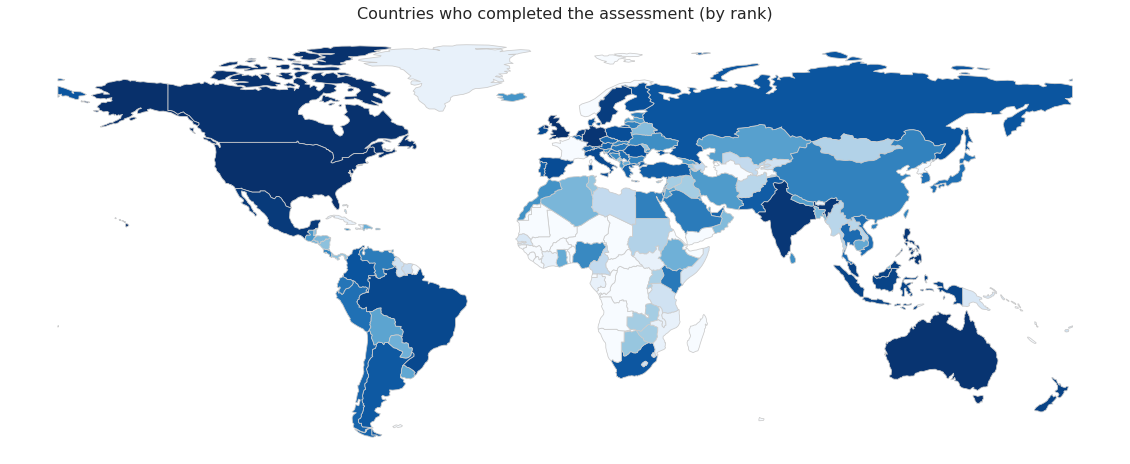

In [0]:
sb.set_style("white")

file = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(file)
world = pd.merge(world, right=paises_rank, how='left', on='iso_a3').fillna(0)

fig, ax = plt.subplots(figsize=(20,10))
# sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=world['rank'].min(), vmax=world['rank'].max()))
# sm.set_array([])
# fig.colorbar(sm)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Countries who completed the assessment (by rank)', size=16)
world.drop(159).plot(column='rank', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8'); sb.set()
plt.box(on=None)

Podemos ver el número de registros por pais de los  datos, donde los datos mayoritariamente provienen de USA

Si hacemos un análisis de Time series sobre la variable dateload y el indice IPC

Nos creamos una columna año y otra para el mes

In [0]:
BIG5_df['year'] = BIG5_df.apply(lambda x: datetime.strptime(x['dateload'], '%Y-%m-%d %H:%M:%S').year, axis=1)
BIG5_df['month'] = BIG5_df.apply(lambda x: datetime.strptime(x['dateload'], '%Y-%m-%d %H:%M:%S').month, axis=1)

extraemos las fechas

In [0]:
date = BIG5_df[['year', 'month', 'IPC']]

extraemos el analisis de las fechas

In [0]:
date_analysis = pd.DataFrame(date.groupby(['year', 'month']).agg('count')).reset_index()

ploteamos la salida

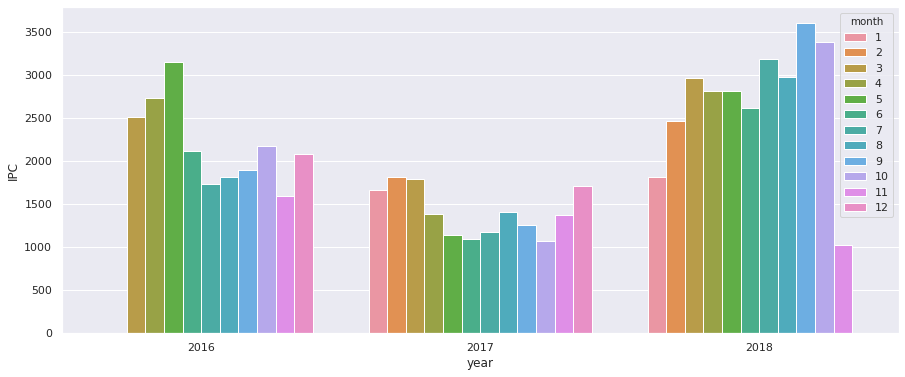

In [0]:
plt.figure(figsize=(15, 6))
sb.barplot(x="year", hue="month", y="IPC", data=date_analysis)
plt.show()

Podemos ver que los años donde se han hecho los test son 2016-2017-2018 y el mes donde mas test se hicieron es Septiembre del 2018

**5.DATA ENCODING**

Para facilitar el trabajo a los algoritmos vamos a transformar las variables categoricas en numericas con la tecnica de label encoding

In [0]:
labelDict = {}
for feature in BIG5_df:
    le = preprocessing.LabelEncoder()
    le.fit(BIG5_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    BIG5_df[feature] = le.transform(BIG5_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue


**6. CORRELACIÓN DE VARIABLES**

Al ser un dataset tan garnde y con tantas variables necesitamos ver la correlación de las variables para ver si podemos reducir el tamaño de las caracteristicas a tratar

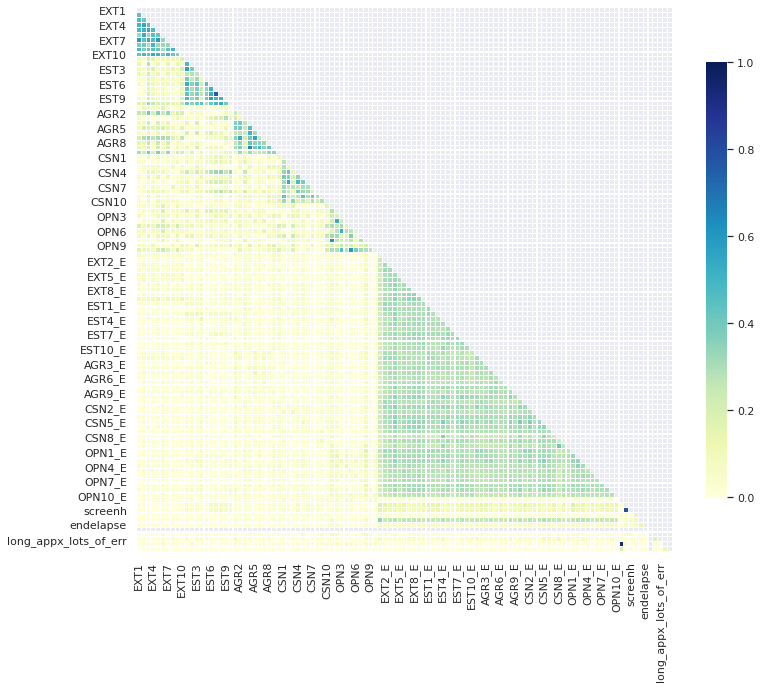

In [0]:
def corr_data():
  # Compute the correlation matrix
  corr = np.abs(BIG5_df.drop(['country'], axis=1).corr())
  # Generate a mask for the upper triangle
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(12, 10))

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
              linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

  plt.show()
corr_data()

Viendo la gráfica vemos que existen variables correlacionadas entre si, esas variabes las vamos a eliminar en la medida de los4 posible para simplifiicar los datos.

Nos quedamos con las 10 features mas representativas haciendolo todo con una gráfica de calor

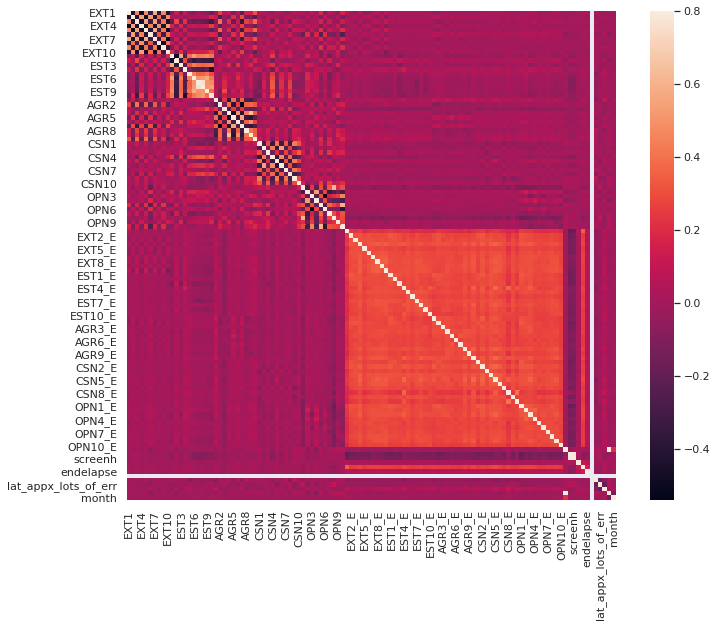

In [0]:
corrmat = BIG5_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);
plt.show()

podemos ver las relación de las 10 primeras columnas mas correlacionadas de esta otra forma

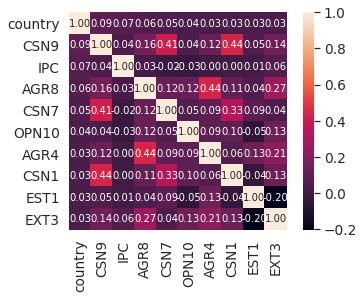

In [0]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'country')['country'].index
cm = np.corrcoef(BIG5_df[cols].values.T)
sb.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

 Estas caracteristicas que estan altamente correlacinadas entre si se llaman colineales, la eliminación de una de ellas puede mejorar el rendimiento de nuestro modelo.
Hay que tener en cuenta que son relacionens entre las caracteristicas entre si no con nuestro target Vamos a crear una función que me elimine aquellas caracteristicas con un umbral de 0,6 para ver como se comporta el modelo

In [0]:
def eliminar_variables_colineadas(df,target,umbral):
 
    # Separamos para no eliminar el target
    y = df[target]
    df = df.drop(columns = [target])
    
    # Calculamos la matriz
    corr_matrix = df.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # Si supera el umbral la elimino una de ellas
            if val >= umbral:
                drop_cols.append(col.values[0])

    
    drops = set(drop_cols)
    df = df.drop(columns = drops)
    
    
    # Add the score back in to the data
    df[target] = y
               
    return df

In [0]:
 #Eliminados las variables
BIG5_df=eliminar_variables_colineadas(BIG5_df,'country',0.6)

Con esta tactica solo hemos eliminado 2 columnas , ya que la correlación no es mucho mayor del 0.6

In [0]:
BIG5_df.shape

(68451, 109)

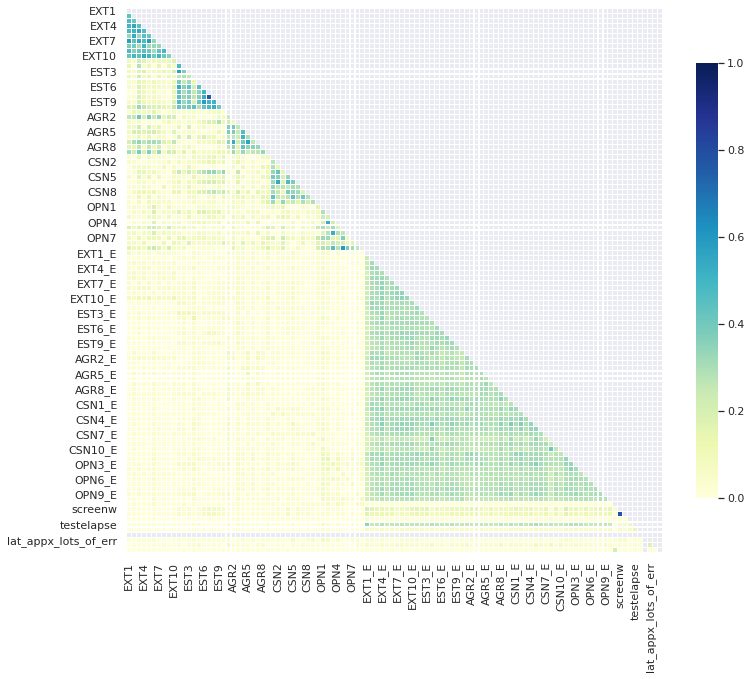

In [0]:
corr_data()

**7. DISTRIBUCIÓN DE FRECUENCIAS**

 Empezaremos por la distribución de nuestra variable objetivo(Country)

También podemos ver un boxplot de nuestra variable target

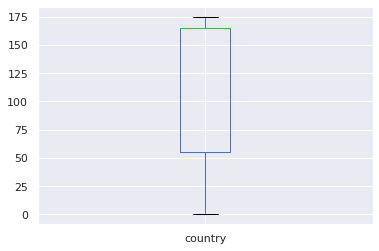

In [0]:
BIG5_df.boxplot(column='country')
plt.show()

Ploteamos la target para ver su distribucíon

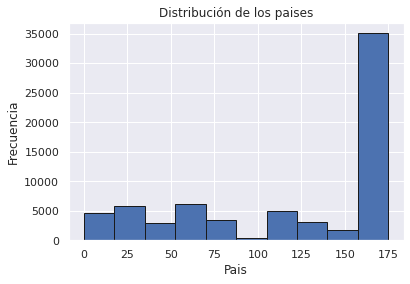

In [0]:
plt.hist(BIG5_df['country'].dropna(), bins = 10, edgecolor = 'k');
plt.xlabel('Pais'); plt.ylabel('Frecuencia'); 
plt.title('Distribución de los paises');

Podríamos ir una a una viendo la distribución de todas nuestras variables numericas, intentando buscar patrones,tendencia....info que nos pueda servir

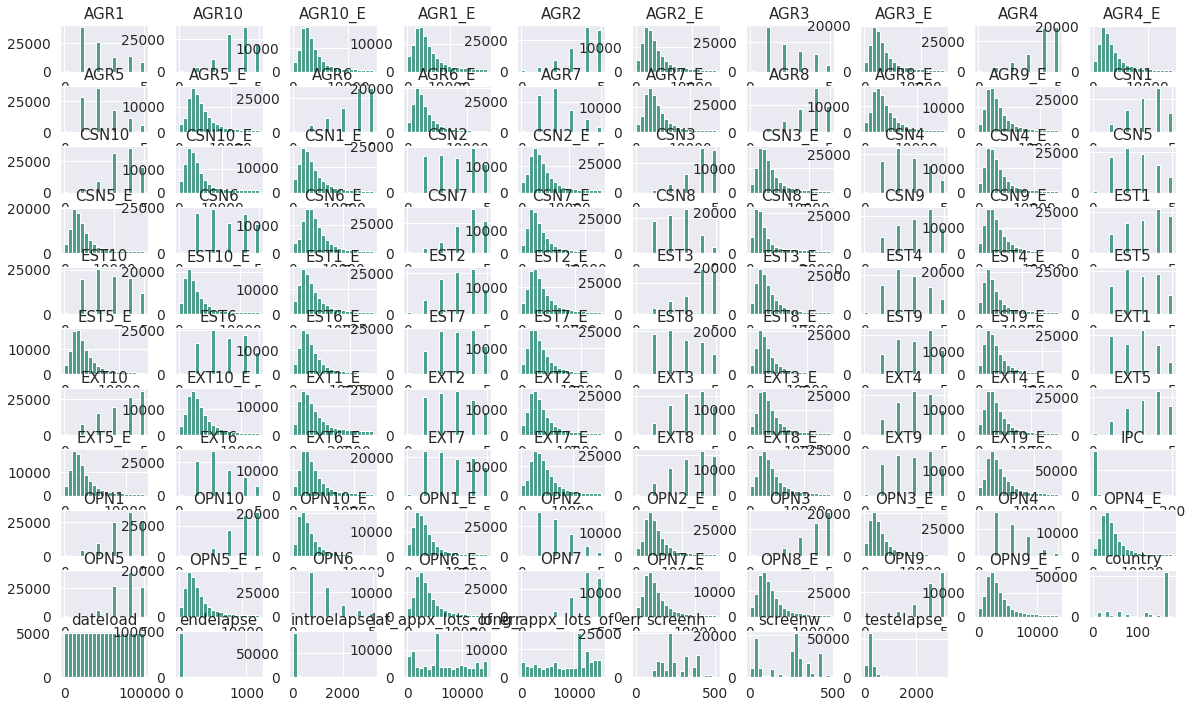

In [0]:
#Distribución de freciencias
BIG5_df.hist(figsize=(20,12),bins = 20, color="#007959AA")
plt.title("Features Distribution")
plt.show()

En esta gráfica podemos ver tambie´n la distribución de frecuencia, notese que los paises estan Con el encoding anterioir y se han pasado a numericos

Text(0.5, 0, 'Pais')

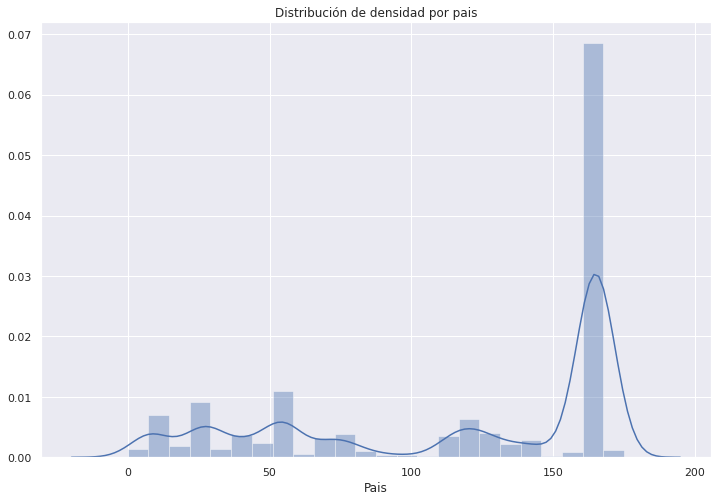

In [0]:
plt.figure(figsize=(12,8))
sns.distplot(BIG5_df["country"], bins=24)
plt.title("Distribución de densidad por pais")
plt.xlabel("Pais")

Podríamos  deberíamos hacer un escalado de variable spero al ser un dataset numerico y ya preprocesado no creoq ue hafa falta, lo veremos en los resultados

**8. PREPARACIÓN DE DATOS PARA ALGORITMOS**

Preparamos los datos para los algorimos.

Definimos X e y que se corresponden con features y label

In [0]:
# Definimos X e y qu
feature_cols = ['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10',
                'EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10',
                'AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR10',
                'CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10',
                'OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN9','OPN10',
                'EXT1_E','EXT2_E','EXT3_E','EXT4_E','EXT5_E','EXT6_E','EXT7_E','EXT8_E','EXT9_E','EXT10_E'
                ,'EST1_E','EST2_E','EST3_E','EST4_E','EST5_E','EST6_E','EST7_E','EST8_E','EST9_E','EST10_E',
                'AGR1_E','AGR2_E','AGR3_E','AGR4_E','AGR5_E','AGR6_E','AGR7_E','AGR8_E','AGR9_E','AGR10_E',
                'CSN1_E','CSN2_E','CSN3_E','CSN4_E','CSN5_E','CSN6_E','CSN7_E','CSN8_E','CSN9_E','CSN10_E',
                'OPN1_E','OPN2_E','OPN3_E','OPN4_E','OPN5_E','OPN6_E','OPN7_E','OPN8_E','OPN9_E','OPN10_E',
                'dateload','screenw','screenh','introelapse','testelapse','endelapse','IPC','lat_appx_lots_of_err','long_appx_lots_of_err']
X = BIG5_df[feature_cols]
y = BIG5_df.country

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Nos creamos los siguientes diccionarios para las graficas finales

In [0]:
modelDict = {}
rmseDict = ()

# **9.EVALUACIÓN INICIAL DE MODELOS**


  **A. PRUEBA INICIAL DE LOGISTIC REGRESSION**




Entrenamos nuestros datos con el algoritmo de regresión logistica

In [0]:
logistic_reg = LogisticRegression(random_state=0).fit(X_train, y_train)

Sacamos las predicciones sobre los  datos de test

In [0]:
prediction = logistic_reg.predict(X_test)

Vemos que el accuracy es bastante bajo, además de tardar muchísimo en entrenar ya que son muchísimas variables y los resultados obtenidos spn malos, voy a probar en primer lugar a hacer una reducción de dimensionalidad, quedandome solo con las 10 variables mas correlacionadas y con por ejemplo las 10 ultimas.

In [0]:
print (colored('\033[1m' +f'Con regresión logistica obtenemos una accuracy en TEST de: {accuracy_score(y_test, prediction)*100}%',"red"))

Con regresión logistica obtenemos una accuracy en TEST de: 62.60119087442296%


Con **regresión logística** obtenemos una accuracy en **TEST de 62.60119087442296%**

En primer lugar nos vamos a quedar con las 50 primeras variables y nuestro target.

Una vez hecho el split nos vamos a quedar con las 12 primeras variables que salen de la correlación de variables y con las 7 últimas, de esta manera vamosa reducir la dimensionalidad de nuestros datos y vamos a intentar reducir el overfitting al coger variables correlacionadas y no

In [0]:
BIG5_df_answer_data = BIG5_df.iloc[:,0:50]
BIG5_df_answer_data['country'] = BIG5_df['country']
BIG5_df_corr_data = pd.DataFrame(BIG5_df_answer_data.corr()['country'][:])
BIG5_df_corr_data = BIG5_df_corr_data.reset_index()
BIG5_df_top_correlation = BIG5_df_corr_data.sort_values('country', ascending=False).head(12)['index'].to_list()
BIG5_df_least_correlation = BIG5_df_corr_data.sort_values('country', ascending=False).tail(7)['index'].to_list()
BIG5_df_correlation_data = BIG5_df_answer_data[BIG5_df_top_correlation+BIG5_df_least_correlation]
BIG5_df_target_data = BIG5_df['country']

Separamos los datos

In [0]:
var_train, var_test, res_train, res_test = train_test_split(BIG5_df_correlation_data, BIG5_df_target_data, test_size = 0.2,random_state=42)
var_train, var_val, res_train, res_val = train_test_split(var_train, res_train, test_size=0.1, random_state=42)

In [0]:
print('Training Feature Size: ', var_train.shape)
print('Testing Feature Size:  ', var_test.shape)
print('Validation Feature Size:  ', var_val.shape)
print('Training Labels Size:  ', res_train.shape)
print('Testing Labels Size:   ', res_test.shape)
print('Validation Labels Size:   ', res_val.shape)


Training Feature Size:  (49284, 19)
Testing Feature Size:   (13691, 19)
Validation Feature Size:   (5476, 19)
Training Labels Size:   (49284,)
Testing Labels Size:    (13691,)
Validation Labels Size:    (5476,)


Vemos como hemos reducido las dimensiones y nos hemos quedado con 19 variables y el target

Nos creamos unas funciones para comparar los modelos

In [0]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(var_train, res_train)
    
    # Make predictions and evalute
    model_pred = model.predict(var_test)
    model_mae = mae(res_test, model_pred)
    score = model.score(var_test, res_test)
    # Return the performance metric
    return model_mae,score

Vamos a entrenar nuestros algoritmos



**A. Logistic Regression**

In [0]:
lr = LogisticRegression(random_state=0)
lr_mae,lr_score = fit_and_evaluate(lr)

print('Con regresión logistica y redución de dimensionalidad obtenemos una MAE en TEST de: MAE = %0.4f' % lr_mae)
print (colored('\033[1m' +f'Con regresión logistica y redución de dimensionalidad obtenemos una accuracy en TEST de: {lr_score*100}%',"red"))

Con regresión logistica y redución de dimensionalidad obtenemos una MAE en TEST de: MAE = 28.4557
Con regresión logistica y redución de dimensionalidad obtenemos una accuracy en TEST de: 52.39938645825725%


Con regresión logistica y redución de dimensionalidad obtenemos una MAE en TEST de: MAE = 26.8553

Con **regresión logistica** y redución de dimensionalidad obtenemos una accuracy en **TEST de: ACC = 0.5706**

Visto que el algoritmo no funciona correctamente, me hace pensar que alguna de las transformaciones que hemos hecho anteriormente no son muy acertadas, asi que voy a probar a hacer una limpieza diferente.

En primer lugar voy a usar el dataset original para empezar de nuevo

In [0]:
BIG5_df_2 = pd.read_csv('proyectofinalkcdll/data/bif5data_final.csv',encoding="ISO-8859-1", sep="\t")

Me quedo con un sample de los datos

In [0]:
seed=np.random.seed(123)
BIG5_df_2 = BIG5_df_2.sample(n=100000, random_state=seed)

Elimino los nan

In [0]:
BIG5_df_2 = BIG5_df_2.dropna()

No voy a usar todas las columnas, solo usaremos las 50 primeras que son las respuestas al test y el target(country)

In [0]:
BIG5_df_2_answer_data = BIG5_df_2.iloc[:,0:50]

In [0]:
BIG5_df_2_answer_data['country'] = BIG5_df_2['country']

Categorizamos las variables para que sean mas homogeneas

In [0]:
for col in BIG5_df_2_answer_data.columns:
    BIG5_df_2_answer_data[col] = BIG5_df_2_answer_data[col].astype('category').cat.codes

Hacemos la correlación de las variables para quedanos con las 12 mas correlacionaas y las 7 menos

In [0]:
BIG5_df_corr_data = pd.DataFrame(BIG5_df_2_answer_data.corr()['country'][:])

reseteamos los indices

In [0]:
BIG5_df_corr_data = BIG5_df_corr_data.reset_index()

Nos quedamos con las 12 mas correlacionadas y las 5 menos

In [0]:
BIG5_df_top_correlation = BIG5_df_corr_data.sort_values('country', ascending=False).head(10)['index'].to_list()
BIG5_df_least_correlation = BIG5_df_corr_data.sort_values('country', ascending=False).tail(5)['index'].to_list()

In [0]:
BIG5_df_correlation_data = BIG5_df_2_answer_data[BIG5_df_top_correlation+BIG5_df_least_correlation]

Definimos nuestra target

In [0]:
BIG5_df_target_data = BIG5_df_2_answer_data['country']

Separamos los datos

In [0]:
var_train, var_test, res_train, res_test = train_test_split(BIG5_df_correlation_data, BIG5_df_target_data, test_size=0.2, random_state=123)
var_train, var_val, res_train, res_val = train_test_split(var_train, res_train, test_size=0.1, random_state=42)

In [0]:
len(np.unique(BIG5_df_2['country']))

179

In [0]:
print('Training Feature Size: ', var_train.shape)
print('Testing Feature Size:  ', var_test.shape)
print('Validation Feature Size:  ', var_val.shape)
print('Training Labels Size:  ', res_train.shape)
print('Testing Labels Size:   ', res_test.shape)
print('Validation Labels Size:   ', res_val.shape)

Training Feature Size:  (71743, 15)
Testing Feature Size:   (19929, 15)
Validation Feature Size:   (7972, 15)
Training Labels Size:   (71743,)
Testing Labels Size:    (19929,)
Validation Labels Size:    (7972,)


Entrenamos los algoritmos y sacamos métricas


**Comparación de modelos de machine learning en una métrica de rendimiento**
* Logistic Regression
* K-Nearest Neighbors classifier
* XGB
* DecisionTreeClassifier
* Random Forest Classifier
* SVC
* K-Nearest Neighbors Regression
* BaggingClassifier
* AdaBoostClassifier
* Stacking
* NN

**A. Logistic Regression**

In [0]:
lr = LogisticRegression(random_state=0)
lr_mae,lr_score = fit_and_evaluate(lr)
modelDict['Log. Regres.'] = lr_score * 100

print('Con regresión logistica y redución de dimensionalidad obtenemos una MAE en TEST de: MAE = %0.4f' % lr_mae)
print (colored('\033[1m' +f'Con regresión logistica y redución de dimensionalidad obtenemos una accuracy en TEST de: {lr_score*100}%',"red"))

Con regresión logistica y redución de dimensionalidad obtenemos una MAE en TEST de: MAE = 6.2820
Con regresión logistica y redución de dimensionalidad obtenemos una accuracy en TEST de: 72.39700938331075%


Con regresión logistica y redución de dimensionalidad obtenemos una MAE en TEST de: MAE = 6.2820

Con regresión logistica y redución de dimensionalidad obtenemos una accuracy en TEST de: **72.39700938331075%**

**B.KNeighbors Classifier**

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_mae,knn_score = fit_and_evaluate(knn)
modelDict['KNN.'] = knn_score * 100
print('K-Nearest Neighbors Classifier Performance on the test set: MAE = %0.4f' % knn_mae)
print (colored('\033[1m' +f'K-Nearest Neighbors Classifier Performance on the test set: ACC = {knn_score*100}%',"red"))

K-Nearest Neighbors Classifier Performance on the test set: MAE = 0.0902
K-Nearest Neighbors Classifier Performance on the test set: ACC = 92.87972301670932%


K-Nearest Neighbors Classifier Performance on the test set: MAE = 0.0902

K-Nearest Neighbors Classifier Performance on the test set: ACC = **92.87972301670932%**

**C.XGB CLASSIFIER**

In [0]:
#xgb_model = xgb.XGBClassifier(learning_rate=0.05, 
#           max_depth=3,
#              gamma=0.08435594187707007,
#              colsample_bytree=0.5336629698328548,
#              n_estimators=1000, 
#              objective='binary:logistic', 
#              random_state=42)

#Tarda mucho en entrenar
xgb_model = xgb.XGBClassifier(learning_rate=0.05, 
              max_depth=3,
              gamma=0.08435594187707007,
              colsample_bytree=0.5336629698328548,
              n_estimators=1000, 
              objective='binary:logistic', 
              random_state=42)
xgb_mae,xgb_score = fit_and_evaluate(xgb_model)
modelDict['KNN.'] = xgb_score * 100
print('XGB Classifier Performance on the test set: MAE = %0.4f' % xgb_mae)
print (colored('\033[1m' +f'XGB Classifier Performance on the test set: ACC = {xgb_score*100}%',"red"))

**D.DecisionTreeClassifier**

In [0]:
treeModel = DecisionTreeClassifier()
tree_mae,tree_ACC_score = fit_and_evaluate(treeModel)
modelDict['Tree.'] = tree_ACC_score * 100
print('DecisionTreeClassifier Performance on the test set: MAE = %0.4f' % tree_mae)
print (colored('\033[1m' +f'Decision Tree Classifier Performance on the test set: ACC = {tree_ACC_score*100}%',"red"))

DecisionTreeClassifier Performance on the test set: MAE = 0.0003
Decision Tree Classifier Performance on the test set: ACC = 99.96989312057806%


DecisionTreeClassifier Performance on the test set: MAE = 0.0007

KDecisionTreeClassifier Performance on the test set: ACC = 0.9993

**E.RandomForestClassifier**

In [0]:
random_forest = RandomForestClassifier(random_state=0,n_estimators = 20)
random_forest_mae,random_forest_score = fit_and_evaluate(random_forest)
modelDict['Random F.'] = random_forest_score * 100
print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)
print (colored('\033[1m' +f'Random Forest Regression Performance on the test set: ACC = {random_forest_score*100}%',"red"))

Random Forest Regression Performance on the test set: MAE = 3.5758
Random Forest Regression Performance on the test set: ACC = 81.64985699232274%


Random Forest Regression Performance on the test set: MAE = 3.7125

Random Forest Regression Performance on the test set: ACC = 0.8065

**F.SVC**

In [0]:
SVC = svm.SVC(C=1000,gamma=.1)
SVC_mae,SVC_score = fit_and_evaluate(SVC)
modelDict['SVC.'] = SVC_score * 100
print('SVC Performance on the test set: MAE = %0.4f' % SVC_mae)
print (colored('\033[1m' +f'SVC Performance Performance on the test set: ACC = {SVC_score*100}%',"red"))

SVC Performance on the test set: MAE = 1.4305
SVC Performance Performance on the test set: ACC = 96.16639068693863%


Random Forest Regression Performance on the test set: MAE = 1.5707

Random Forest Regression Performance on the test set: ACC = 0.9599

También podemos usar una serie de modelos mas complejos como son los siguientes:
1.   AdaBoostClassifier

2.   NN




**G. AdaBoostClassifier**

Probemos el algoritmo AdaBoostClassifier tomando como modelo base un árbol de decisión. 

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
boost_mae,boost_score = fit_and_evaluate(boost)
modelDict['boost.'] = boost_score * 100
print('Boost Performance on the test set: MAE = %0.4f' % boost_mae)
print (colored('\033[1m' +f'Boost Performance Performance on the test set: ACC = {boost_score*100}%',"red"))

Boost Performance on the test set: MAE = 3.1082
Boost Performance Performance on the test set: ACC = 72.251492799438%


Boost Performance on the test set: MAE = 3.1082
Boost Performance Performance on the test set: ACC = **72.251492799438%**

**H.NN**

In [0]:
model = Sequential()
model.add(Dense(64, input_shape=(var_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='softmax'))  

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

model.fit(var_train, res_train,
          validation_data=(var_val, res_val),
          epochs=50,
          batch_size=8)

**11.NN PARA REGRESIÓN RASGO**

En este caso quiero entrenar una NN para predecir por regresión cada una de los 5 rasgos de personalidad del test.

Para ello en primer lugar usare un nuevo dataset y haré las transformaciones previas para poder realizar el ejercicio.

Nos creamos un nuevo dataset lite

In [0]:
BIG5_df2 = pd.read_csv('proyectofinalkcdll/data/bif5data_final.csv',encoding="ISO-8859-1", sep="\t")

Vamos a quedarnos con una muestra de lso datos

In [0]:
seed=np.random.seed(123)
BIG5_df2 = BIG5_df2.sample(n=10000, random_state=seed)

Nos creamos una columna feature nueva por cada una de las 5 dimensiones para promediar las 50 preguntas

In [0]:
# Extraversion 
EXT = list(BIG5_df2.columns[:10])
# Emotional Stability
EST = list(BIG5_df2.columns[10:20])
# Agreeableness
AGR = list(BIG5_df2.columns[20:30])
# Conscientiousness
CSN = list(BIG5_df2.columns[30:40])
# Openness
OPN = list(BIG5_df2.columns[40:50])

dimensions = [EXT,EST,AGR,CSN,OPN]
dimension_averages=["extraversion","emotional_stability",
       "agreeableness","conscientiousness","openness"]

Añadimos esas features a nuestro dataset, los usaremos para la NN e intentar predecir por regresión alguna de las caracteristicas

In [0]:
for d in range(len(dimensions)):
    BIG5_df2[dimension_averages[d]] = BIG5_df2[dimensions[d]].mean(axis=1)

POdemos ver las nuevas columnas

In [246]:
BIG5_df2[dimension_averages].describe()

extraversion  emotional_stability  agreeableness  conscientiousness  \
count   9984.000000          9984.000000    9984.000000        9984.000000   
mean       3.024259             3.024169       3.161759           3.124890   
std        0.375681             0.660810       0.392653           0.417645   
min        0.000000             0.000000       0.000000           0.000000   
25%        2.800000             2.600000       2.900000           2.900000   
50%        3.000000             3.000000       3.200000           3.100000   
75%        3.200000             3.500000       3.400000           3.400000   
max        5.000000             5.000000       5.000000           5.000000   

          openness  
count  9984.000000  
mean      3.272426  
std       0.415694  
min       0.000000  
25%       3.000000  
50%       3.300000  
75%       3.500000  
max       5.000000

In [247]:
BIG5_df2.head()

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  \
834672   2.0   4.0   4.0   2.0   3.0   2.0   4.0   1.0   1.0    4.0   5.0   
49651    3.0   1.0   3.0   3.0   3.0   1.0   4.0   4.0   3.0    4.0   4.0   
679107   2.0   2.0   3.0   4.0   5.0   2.0   2.0   5.0   1.0    5.0   4.0   
391570   5.0   3.0   4.0   3.0   4.0   2.0   5.0   2.0   5.0    4.0   2.0   
699696   4.0   2.0   3.0   3.0   3.0   2.0   4.0   2.0   3.0    5.0   2.0   

        EST2  EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  \
834672   4.0   5.0   2.0   1.0   1.0   1.0   1.0   1.0    1.0   3.0   4.0   
49651    2.0   5.0   2.0   1.0   3.0   3.0   3.0   2.0    4.0   5.0   5.0   
679107   2.0   4.0   4.0   2.0   1.0   2.0   1.0   2.0    1.0   1.0   5.0   
391570   5.0   5.0   3.0   2.0   1.0   4.0   3.0   1.0    2.0   1.0   5.0   
699696   5.0   3.0   3.0   4.0   3.0   1.0   1.0   2.0    3.0   4.0   4.0   

        AGR3  AGR4  AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  \
834672   1.0   4.0   2.0   3.0   2.0   4.0   4.0    3.0   5.0   5.0   5.0   
49651    1.0   4.0   1.0   5.0   1.0   4.0   4.0    4.0   2.0   4.0   5.0   
679107   1.0   5.0   2.0   4.0   2.0   5.0   4.0    5.0   2.0   4.0   4.0   
391570   1.0   5.0   2.0   5.0   2.0   5.0   5.0    5.0   3.0   4.0   5.0   
699696   3.0   3.0   3.0   4.0   3.0   4.0   3.0    3.0   4.0   1.0   4.0   

        CSN4  CSN5  CSN6  CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  \
834672   1.0   2.0   5.0   2.0   2.0   3.0    4.0   4.0   5.0   5.0   4.0   
49651    4.0   1.0   2.0   2.0   3.0   2.0    3.0   4.0   2.0   4.0   2.0   
679107   2.0   1.0   2.0   4.0   2.0   4.0    4.0   4.0   4.0   5.0   1.0   
391570   2.0   3.0   3.0   4.0   3.0   4.0    3.0   4.0   1.0   5.0   1.0   
699696   2.0   4.0   4.0   3.0   3.0   4.0    3.0   3.0   3.0   3.0   2.0   

        OPN5  OPN6  OPN7  OPN8  OPN9  OPN10   EXT1_E  EXT2_E  EXT3_E   EXT4_E  \
834672   4.0   2.0   5.0   1.0   2.0    4.0   6375.0  3132.0  2855.0   3856.0   
49651    4.0   2.0   4.0   2.0   4.0    4.0  14630.0   733.0  3168.0  11468.0   
679107   5.0   1.0   2.0   2.0   5.0    5.0  23594.0  4526.0  4458.0   4936.0   
391570   4.0   1.0   5.0   3.0   5.0    5.0   2647.0  1861.0  2282.0   3574.0   
699696   3.0   2.0   3.0   3.0   4.0    3.0  21454.0  4503.0  3209.0   3286.0   

        EXT5_E  EXT6_E  EXT7_E  EXT8_E  EXT9_E  EXT10_E  EST1_E  EST2_E  \
834672  2473.0  2630.0  5214.0  3179.0  4125.0   3089.0  1148.0  5329.0   
49651   2663.0  2300.0  2772.0  2013.0  3483.0   1969.0  6745.0  2465.0   
679107  3008.0  6609.0  3439.0  7293.0  2558.0   4589.0  6445.0  3159.0   
391570  3661.0  3911.0  3831.0  4313.0  2158.0   2468.0  3461.0  4882.0   
699696  2791.0  4177.0  9555.0  3964.0  4547.0   2697.0  2376.0  4167.0   

        EST3_E  EST4_E  EST5_E  EST6_E  EST7_E  EST8_E  EST9_E  EST10_E  \
834672  2005.0  4612.0  2544.0  3575.0  2359.0  1780.0  1626.0   1063.0   
49651   1117.0  4286.0  1735.0  3238.0  6523.0  1200.0  2033.0   7468.0   
679107  2323.0  6123.0  3486.0  2357.0  4554.0  2034.0  2200.0   4345.0   
391570  3529.0  3354.0  2529.0  2452.0  2958.0  2162.0  2183.0    979.0   
699696  1892.0  3815.0  2120.0  2391.0  3380.0  2487.0  1415.0   1150.0   

         AGR1_E  AGR2_E  AGR3_E  AGR4_E  AGR5_E  AGR6_E  AGR7_E  AGR8_E  \
834672   4470.0  4809.0   983.0  2827.0  2762.0  5225.0  2387.0  2925.0   
49651    3501.0  6404.0  3248.0  3670.0  2167.0  2086.0  2445.0  2097.0   
679107  12097.0  1936.0  2872.0  2781.0  8323.0  2446.0  5218.0  6950.0   
391570   2296.0  1963.0  2259.0  2485.0  4745.0  2951.0  7173.0  2692.0   
699696   2689.0  2703.0  2952.0  5591.0  5292.0  5900.0  3466.0  4231.0   

        AGR9_E  AGR10_E   CSN1_E  CSN2_E  CSN3_E  CSN4_E  CSN5_E  CSN6_E  \
834672  3737.0   3859.0   3614.0  3851.0  2246.0  2184.0  2153.0  4267.0   
49651   1752.0   2568.0   4767.0  4116.0  1283.0  3381.0  1666.0  6397.0   
679107  4453.0   3355.0  11316.0  3743.0  4695.0  5643.0  4598.0  4960.0   
391570  1428

Podemos ver esos datos con un boxplot

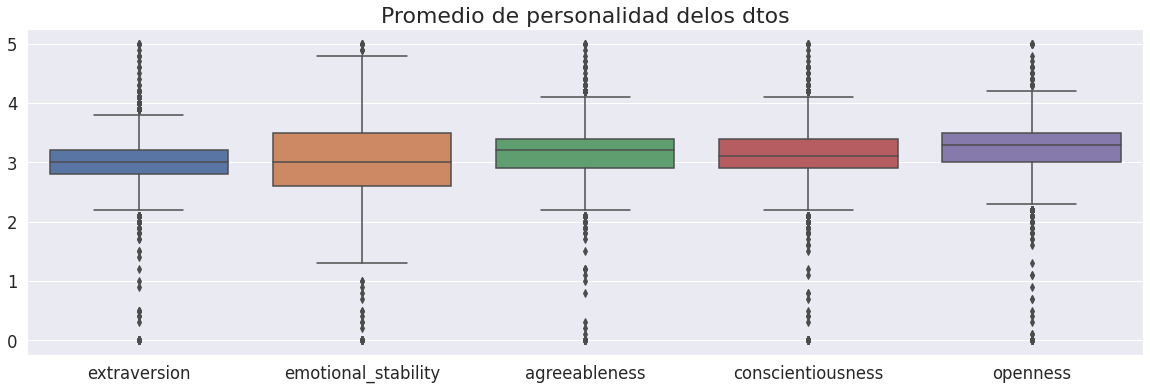

In [248]:
sb.set_style("darkgrid")

sb.set()
plt.figure(figsize=(20, 6))
sb.set(font_scale=1.5)
sb.boxplot(data=BIG5_df2[dimension_averages]);
plt.title("Promedio de personalidad delos dtos",fontsize=22)
plt.show()

Vamos hacer la limpieza de los datos como hemos hecho anteriormente.

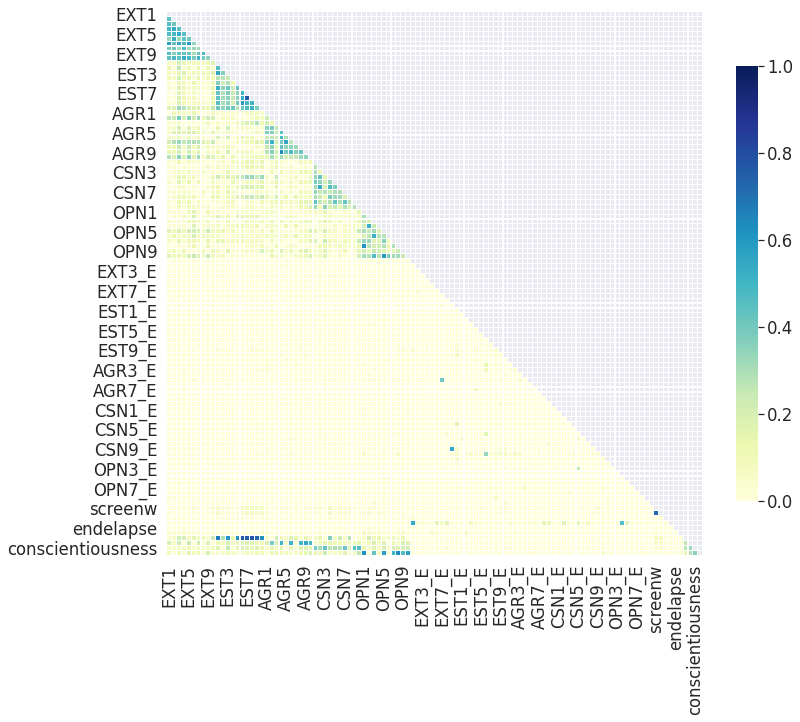

In [249]:
def corr_data2():
  # Compute the correlation matrix
  corr = np.abs(BIG5_df2.drop(['extraversion'], axis=1).corr())
  # Generate a mask for the upper triangle
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(12, 10))

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
              linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

  plt.show()
corr_data2()

Eliminamos las 50 primeras columnas ya que las hemos englobado en las 4 columnas que hemos creado anteriormente

In [250]:
BIG5_df2.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err', 'extraversion', 'emotional_stability',
       'agreeableness', 'conscientiousness', 'openness'],
      dtype='object', length=115)

In [0]:
BIG5_df2.drop(['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10',
                'EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10',
                'AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10',
                'CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10',
                'OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10'], axis=1, inplace=True)

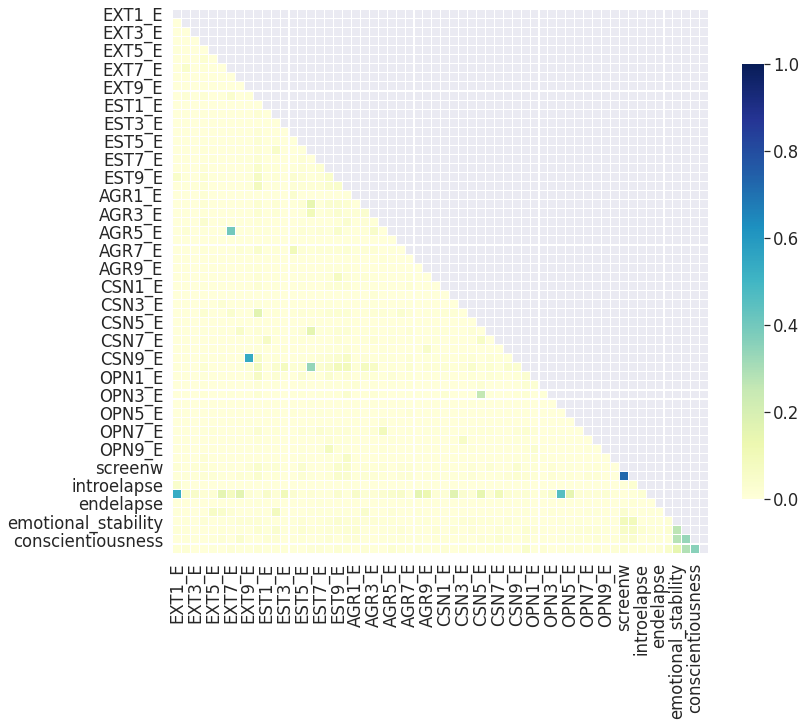

In [229]:
corr_data2()

Vemos que no existe ninguna relación entre las variables o por lo mneos la matriz solo me encuentra relación entre las variables que hemos creado al principio, asi que elimino las variables que no tienen ninguna relación.

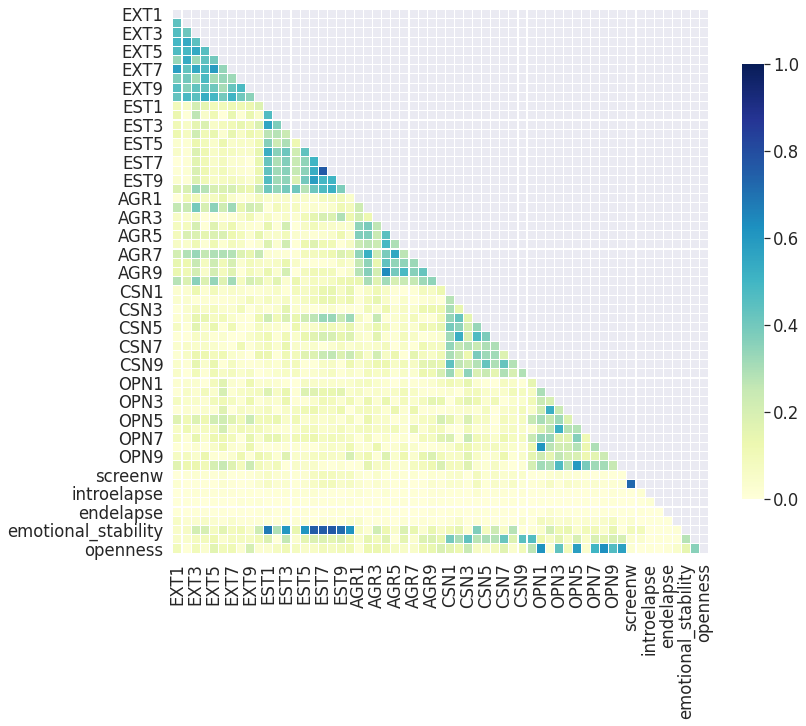

In [252]:
corr_data2()

In [0]:
BIG5_df2.drop(['screenh'], axis=1, inplace=True)

Buscamos antes de nada si existen pacientes que han hecho mas de un test y os eliminamos

In [0]:
BIG5_df2 = BIG5_df2.loc[BIG5_df2['IPC']==1]

Hacemos el tratamiento de los missings

In [254]:
BIG5_df2 = BIG5_df2.dropna()
#missing data
total = BIG5_df2.isnull().sum().sort_values(ascending=False)
percent = (BIG5_df2.isnull().sum()/BIG5_df2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                       Total  Percent
openness                   0      0.0
conscientiousness          0      0.0
AGR10                      0      0.0
AGR9                       0      0.0
AGR8                       0      0.0
AGR7                       0      0.0
AGR6                       0      0.0
AGR5                       0      0.0
AGR4                       0      0.0
AGR3                       0      0.0
AGR2                       0      0.0
AGR1                       0      0.0
EST10                      0      0.0
EST9                       0      0.0
EST8                       0      0.0
EST7                       0      0.0
EST6                       0      0.0
EST5                       0      0.0
EST4                       0      0.0
EST3                       0      0.0
EST2                       0      0.0
EST1                       0      0.0
EXT10                      0      0.0
EXT9                       0      0.0
EXT8                       0      0.0
EXT7        

Realizamos el data encoding

In [0]:
labelDict = {}
for feature in BIG5_df2:
    le = preprocessing.LabelEncoder()
    le.fit(BIG5_df2[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    BIG5_df2[feature] = le.transform(BIG5_df2[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

Preparamos los datos para predecir el rasgo **EXTRAVERSIÓN**

In [256]:
y_reg = BIG5_df2['extraversion']
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(BIG5_df2)
y_reg_norm = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min())
print(y_reg_norm.min())
print(y_reg_norm.max())

0.0
1.0


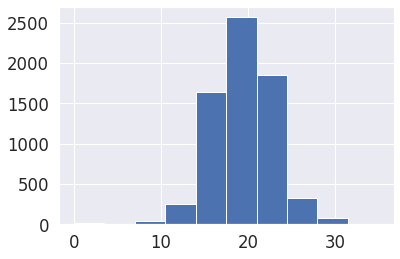

In [257]:
plt.hist(y_reg, bins=10)
plt.show()

Nos creamos los datos. Dividimos los datos en TRAIN, TEST

In [0]:
var_train, var_test, res_train, res_test = train_test_split(data_norm, y_reg_norm, test_size=0.2, random_state=123)
var_train, var_val, res_train, res_val = train_test_split(var_train, res_train, test_size=0.1, random_state=42)

In [259]:
var_train.shape,res_train.shape

((4874, 64), (4874,))

Voy a entrenar un modelo NN para hacer regresión sobre uno de los 5 factores arriba separados que en nuestro caso es y_reg (target) 

Voy a probar con una NN de 3 capas con función de activación relu duarnte 10 épocas

In [269]:
model = Sequential()
model.add(Dense(64, input_shape=(var_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # sin funcion de act y solo 1 neurona

model.compile(loss='mean_squared_error', optimizer='RMSProp')

model.fit(var_train, res_train,
          validation_data=(var_val, res_val),
          epochs=50,
          batch_size=8)

Epoch 1/50
610/610 [==============================] - 2s 4ms/step - loss: 0.0079 - val_loss: 0.0013
Epoch 2/50
610/610 [==============================] - 2s 3ms/step - loss: 0.0018 - val_loss: 9.3678e-04
Epoch 3/50
610/610 [==============================] - 2s 3ms/step - loss: 0.0013 - val_loss: 4.5967e-04
Epoch 4/50
610/610 [==============================] - 2s 3ms/step - loss: 9.2289e-04 - val_loss: 2.2892e-04
Epoch 5/50
610/610 [==============================] - 2s 3ms/step - loss: 7.5620e-04 - val_loss: 2.5840e-04
Epoch 6/50
610/610 [==============================] - 2s 3ms/step - loss: 6.3341e-04 - val_loss: 2.6595e-04
Epoch 7/50
610/610 [==============================] - 2s 3ms/step - loss: 5.4533e-04 - val_loss: 6.9795e-04
Epoch 8/50
610/610 [==============================] - 2s 3ms/step - loss: 4.9610e-04 - val_loss: 2.3346e-04
Epoch 9/50
610/610 [==============================] - 2s 3ms/step - loss: 4.4692e-04 - val_loss: 5.7304e-05
Epoch 10/50
610/610 [=======================

No esta funcionando muy bien el algoritmo, he cambiado las features o intentado cambiar las épocas, las capas y sigue saliendo mal.

Mostramos la pérdida

In [270]:
loss = model.evaluate(var_test, res_test)
print(f'Loss={loss}')

43/43 [==============================] - 0s 2ms/step - loss: 1.7188e-04
Loss=0.00017188025231007487


Reescalamos las predicciones para saber que tal es nuestro modelo

In [0]:
y_reg_min = y_reg.min()
y_reg_max = y_reg.max()

Error medio absoluto: 0.4499200537195945


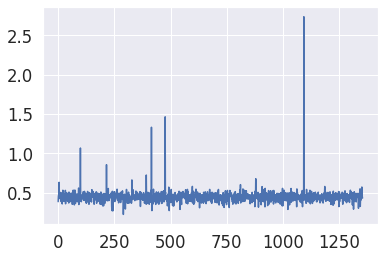

In [272]:
y_pred = model.predict(var_test)
y_pred_denorm = y_pred[:, 0] * (y_reg_max - y_reg_min) + y_reg_min
y_test_denorm = res_test * (y_reg_max - y_reg_min) + y_reg_min
error_denorm = np.abs(y_pred_denorm - y_test_denorm)
plt.plot(range(y_pred.shape[0]), error_denorm)
print(f'Error medio absoluto: {error_denorm.mean()}')

In [273]:
 for gt, pred, e in zip(y_test_denorm, y_pred_denorm, error_denorm):
    print(f'Puntación real para extraversion: {gt:.2f} Puntación predicha para extraversion: {pred:.2f}. Error: {e:.2f}')

Puntación real para extraversion: 15.00 Puntación predicha para extraversion: 15.39. Error: 0.39
Puntación real para extraversion: 25.00 Puntación predicha para extraversion: 25.45. Error: 0.45
Puntación real para extraversion: 16.00 Puntación predicha para extraversion: 16.47. Error: 0.47
Puntación real para extraversion: 18.00 Puntación predicha para extraversion: 18.46. Error: 0.46
Puntación real para extraversion: 19.00 Puntación predicha para extraversion: 19.63. Error: 0.63
Puntación real para extraversion: 15.00 Puntación predicha para extraversion: 15.43. Error: 0.43
Puntación real para extraversion: 21.00 Puntación predicha para extraversion: 21.51. Error: 0.51
Puntación real para extraversion: 20.00 Puntación predicha para extraversion: 20.44. Error: 0.44
Puntación real para extraversion: 21.00 Puntación predicha para extraversion: 21.49. Error: 0.49
Puntación real para extraversion: 19.00 Puntación predicha para extraversion: 19.46. Error: 0.46
Puntación real para extraversi

**12. GRÁFICA DE RESULTADOS**

Una vez entrenadas nuetros algoritmos podemos mostrar los resultados con la siguiente función donde vamos a ver la relación de precisiónd e los mismos

In [0]:
def plotSuccess():
    s = pd.Series(modelDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    colors = ["cyan", "red", "green", "yellow", "orange","black","blue",'pink']
    #colores = ['azul', 'rojo', 'verde', 'verde', 'verde', 'rojo', 'verde', 'verde', 'azul', 'amarillo', 'azul',
    #       'azul', 'verde', 'verde', 'verde', 'amarillo']
    ax = s.plot(kind='bar',colors=colors) 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 100.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

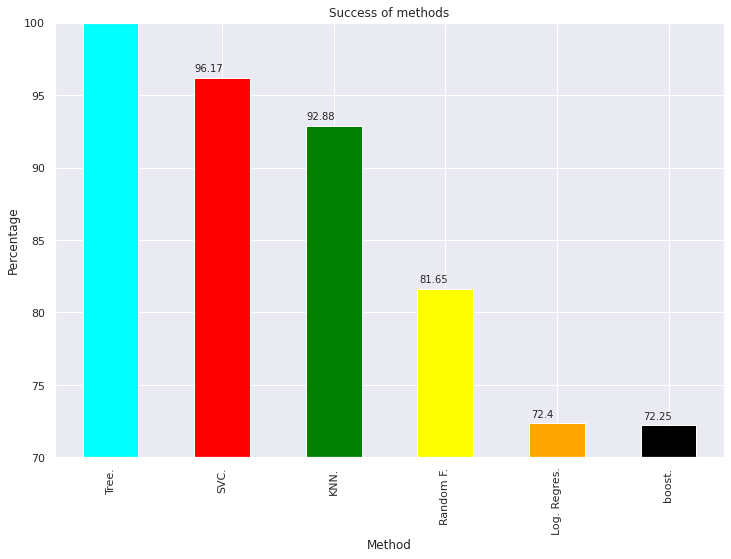

In [0]:
plotSuccess()

Se puede ver claramente que la mayoría de modelos sufren algún tipo de overfitting ya que es bastante raro obtener este tipo de resultados, no obstante al ser un data set de datos ya limpios y reales cabe la posibilidad de que sean correctos asi que sigo con las predicciones.

El modelo Tree parece que roza el 100% de accuracy lo que es bastante extraño. Debe sufrir de overfitting.

**13.PREDICCIONES**

Ahora con el mejor método podemos hacer predicciones sobre los datos de test

In [0]:
# Generate predictions with the best method
clf = RandomForestClassifier(random_state=0,n_estimators = 20)
clf.fit(var_train, res_train)
dfTestPredictionsTest = clf.predict(var_test)

# We don't have any significative field so we save the index
resultsTest = pd.DataFrame({'Index': var_test.index, 'Pais': dfTestPredictionsTest})

resultsTest.head()

Index  Pais
0  437222   120
1  605232   122
2  831007   167
3  649526   167
4  902215   167

**14.CONCLUSIONES**

Para mejorar el resultado de los algoritmos se puede recurrir a técnicas como:

No he querido aplicarlas por el tiempo del que dispongo pero seguramnete el elegir las caracteristicas adecuadas, los hiperparemetros y modificar los parametrso/modelos podría hacerme llegar a una conclusiónmejor o mas real.

No obstante es un dataset muy largo (he hecho sample) y con datos ya preprocesados y los resulytados obtenidos y el analisis nos puede dar una idea de los pasos a seguir para hacer un analisis real.

Claramente hay mil formas de hecerlo y seguramnete ninguna de ellas sea la mas correcta pero es una buena aproximación.

Saco el conclusión que bastantes veces el aloritmo mas sencillo es el que nos da unos resultados en relaci,ón (complejidad/tienmpo/precisión) que nos son suficientes para nuestras resolver nuestras preguntas.